In [1]:
%load_ext autoreload
%autoreload 2
from qiskit_metal import draw, Dict, designs, MetalGUI
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal
# ?metal.qlibrary.core.QComponent.add_qgeometry

design = metal.designs.design_planar.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

# dir(QComponent)
cpw_width = '11.7um'

design._chips.main.size.size_x = '5mm'
design._chips.main.size.size_y = '5mm'
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.couplers.cap_n_interdigital_tee import CapNInterdigitalTee
from qiskit_metal.qlibrary.couplers.line_tee import LineTee

from collections import OrderedDict

import numpy as np
### Top and Bottom
options = Dict(
    orientation = -90,
    pos_y = 2.5 - 0.3,
    # pad_width = '80um',
    # pad_length = '200um',
    # taper_height = '200um',
    trace_width = cpw_width,
    trace_gap = '5.1um'
)
wb1 = LaunchpadWirebond(design, 'wb_top', options=options)

options = Dict(
    orientation = 90,
    pos_y = -2.5 + 0.3,
    # pad_width = '80um',
    # pad_length = '200um',
    # taper_height = '200um',
    trace_width = cpw_width,
    trace_gap = '5.1um'
)
wb2 = LaunchpadWirebond(design, 'wb_bottom', options=options)

xmon1_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215um',
                 ground_spacing = '10um', 
                 claw_gap = '5.1um', 
                 claw_width = '15um',
                 claw_cpw_length = '0um'
                 ),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30um',
    cross_length = '240um',
    cross_gap = '30um',
    orientation = '-90',
    pos_x = '-1500um',
    pos_y = '1200um',
    aedt_hfss_inductance = 9.686E-9
)

# Create a new Transmon Cross object with name 'Q1'
q1 = TransmonCross(design, 'Q1', options=xmon1_options)

otg_options = dict(width = '5.85um', 
                   gap = '5.1um', 
                #    termination_gap = '500um',
                   pos_x='-1200um',  
                   pos_y='1200um', 
                   orientation='180')

otg1 = OpenToGround(design, 'otg1', options=otg_options)


xmon3_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '185.9um',
                 ground_spacing = '4.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um',
                 claw_cpw_length = 0),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '200.9um',
    cross_gap = '29.1um',
    orientation = '90',
    pos_x = '2000.9um',
    pos_y = '1700um',
    aedt_hfss_inductance = 10.471E-9
)

# Create a new Transmon Cross object with name 'Q1'
q3 = TransmonCross(design, 'Q3', options=xmon3_options)

otg_options = dict(width = '5.85um', 
                   gap = '5.1um', 
                #    termination_gap = '500um',
                   pos_x='1700um',  
                   pos_y='1700um', 
                   orientation='0')

otg3 = OpenToGround(design, 'otg3', options=otg_options)

xmon5_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '185um',
                 ground_spacing = '5um', 
                 claw_gap = '5.1um', 
                 claw_width = '10um',
                 claw_cpw_length = 0),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30um',
    cross_length = '200um',
    cross_gap = '30um',
    orientation = '-90',
    pos_x = '-2000um',
    pos_y = '-300um',
    aedt_hfss_inductance = 13.235E-9
)

# Create a new Transmon Cross object with name 'Q1'
q5 = TransmonCross(design, 'Q5', options=xmon5_options)

otg_options = dict(width = '5.85um', 
                   gap = '5.1um', 
                #    termination_gap = '500um',
                   pos_x='-1700um',  
                   pos_y='-300um', 
                   orientation='180')

otg5 = OpenToGround(design, 'otg5', options=otg_options)


xmon2_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215.9um',
                 ground_spacing = '9.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um',
                 claw_cpw_length = 0),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '240.9um',
    cross_gap = '29.1um',
    orientation = '90',
    pos_x = '1500um',
    pos_y = '250um',
    aedt_hfss_inductance = 11.268E-9
)

# Create a new Transmon Cross object with name 'Q1'
q2 = TransmonCross(design, 'Q2', options=xmon2_options)

otg_options = dict(width = '5.85um', 
                   gap = '5.1um', 
                #    termination_gap = '500um',
                   pos_x='1200um',  
                   pos_y='250um', 
                   orientation='0')

otg2 = OpenToGround(design, 'otg2', options=otg_options)


xmon4_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215.9um',
                 ground_spacing = '9.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um',
                 claw_cpw_length = '0'),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '240.9um',
    cross_gap = '29.1um',
    orientation = '-90',
    pos_x = '-1500um',
    pos_y = '-1500um',
    aedt_hfss_inductance = 13.816E-9
)

# Create a new Transmon Cross object with name 'Q1'
q4 = TransmonCross(design, 'Q4', options=xmon4_options)

otg_options = dict(width = '5.85um', 
                   gap = '5.1um', 
                #    termination_gap = '500um',
                   pos_x='-1200um',  
                   pos_y='-1500um', 
                   orientation='180')

otg4 = OpenToGround(design, 'otg4', options=otg_options)


xmon6_options = dict(
    connection_pads=dict(
        # a = dict( connector_location = '0', connector_type = '0'),
        # b = dict(connector_location = '90', connector_type = '0'),
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '200.9um',
                 ground_spacing = '10.9um', 
                 claw_gap = '5.1um', 
                 claw_width = '10.9um',
                 claw_cpw_width = cpw_width,
                 claw_cpw_length = '0'),
        # d = dict(connector_location = '270', connector_type = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '220.9um',
    cross_gap = '29.1um',
    orientation = '90',
    pos_x = '2000um',
    pos_y = '-1200um',
    aedt_hfss_inductance = 12.679E-9
)

# Create a new Transmon Cross object with name 'Q1'
q6 = TransmonCross(design, 'Q6', options=xmon6_options)

otg_options = dict(width = '5.85um', 
                   gap = '5.1um', 
                #    termination_gap = '500um',
                   pos_x='1700um',  
                   pos_y='-1200um', 
                   orientation='0')

otg6 = OpenToGround(design, 'otg6', options=otg_options)


clt1_opts = Dict(prime_width = cpw_width,
                prime_gap = '5.1um',
                second_width = cpw_width,
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                pos_y = '1200um',
                down_length = '50um')

clt1 = CoupledLineTee(design, 'clt1', clt1_opts)

cpw_total_length = 5160 + 716 + 300 + 1881.18568
cpw_total_length = str(cpw_total_length) + 'um'
cpw1_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt1',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'otg1',
                                                  pin = 'open')),
                lead = Dict(end_straight = '70um',
                            # start_jogged_extension = jogsS),
                ),
                fillet = '49.9um',
                total_length = '3900um',#'3893.8166um', # '6776um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um',)
cpw1 = RouteMeander(design, 'cpw1', options = cpw1_opts)


ncap3_opts = Dict(pos_x = '0',
                  pos_y = '1700um',
                  orientation = '90',
                  prime_width = cpw_width,
                  prime_gap = '5.1um',
                  second_width = cpw_width,
                  second_gap = '5.1um',
                  cap_gap = '4.1um',
                  cap_width = '10.9um',
                  cap_gap_ground = '5.1um',
                  finger_length = '30.9um',
                  finger_count = '10',
                  cap_distance = '50.9um',
                  )

NCap3 = CapNInterdigitalTee(design, 'ncap3', options = ncap3_opts)

cpw_total_length = 5160 + 716 + 300 + 1881.18568
cpw_total_length = str(cpw_total_length) + 'um'
cpw3_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'ncap3',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'otg3',
                                                  pin = 'open')),
                lead = Dict(start_straight = '100um',
                            end_straight = '170um'),
                fillet = '49.9um',
                total_length = '8150um', # '6776um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')
cpw3 = RouteMeander(design, 'cpw3', options = cpw3_opts)


ncap5_opts = Dict(pos_x = '0',
                  pos_y = '-300um',
                  orientation = '-90',
                  prime_width = cpw_width,
                  prime_gap = '5.1um',
                  second_width = cpw_width,
                  second_gap = '5.1um',
                  cap_gap = '4.1um',
                  cap_width = '10.9um',
                  cap_gap_ground = '5.1um',
                  finger_length = '30.9um',
                  finger_count = '7',
                  cap_distance = '50.9um',
                  )

NCap5 = CapNInterdigitalTee(design, 'ncap5', options = ncap5_opts)

cpw_total_length = 5160 + 716 + 300 + 1881.18568
cpw_total_length = str(cpw_total_length) + 'um'
cpw5_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'ncap5',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'otg5',
                                                  pin = 'open')),
                lead = Dict(start_straight = '100um'),
                fillet = '49.9um',
                total_length = '8025um', # '6776um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')
cpw5 = RouteMeander(design, 'cpw5', options = cpw5_opts)


clt2_opts = Dict(prime_width = cpw_width,
                prime_gap = '5.1um',
                second_width = cpw_width,
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '90',
                pos_y = '250um',
                down_length = '50um')

clt2 = CoupledLineTee(design, 'clt2', clt2_opts)

cpw_total_length = 5160 + 716 + 300 + 1881.18568
cpw_total_length = str(cpw_total_length) + 'um'
cpw2_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt2',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'otg2',
                                                  pin = 'open')),
                lead = Dict(end_straight = '70um',
                            # start_jogged_extension = jogsS),
                ),
                fillet = '49.9um',
                total_length = '3700um', # '6776um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')
cpw2 = RouteMeander(design, 'cpw2', options = cpw2_opts)


clt4_opts = Dict(prime_width = cpw_width,
                prime_gap = '5.1um',
                second_width = cpw_width,
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                pos_y = '-1500um',
                down_length = '50um')

clt4 = CoupledLineTee(design, 'clt4', clt4_opts)

cpw_total_length = 5160 + 716 + 300 + 1881.18568
cpw_total_length = str(cpw_total_length) + 'um'
cpw4_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'clt4',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'otg4',
                                                  pin = 'open')),
                lead = Dict(start_straight = '10um',
                            end_straight = '70um'),
                #             ),
                fillet = '49.9um',
                total_length = '3550um', # '6776um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')
cpw4 = RouteMeander(design, 'cpw4', options = cpw4_opts)


ncap6_opts = Dict(pos_x = '0',
                  pos_y = '-1000um',
                  orientation = '90',
                  prime_width = cpw_width,
                  prime_gap = '5.1um',
                  second_width = cpw_width,
                  second_gap = '5.1um',
                  cap_gap = '4.1um',
                  cap_width = '10.9um',
                  cap_gap_ground = '5.1um',
                  finger_length = '30.9um',
                  finger_count = '4',
                  cap_distance = '50.9um',
                  )

NCap6 = CapNInterdigitalTee(design, 'ncap6', options = ncap6_opts)

cpw6_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'ncap6',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'otg6',
                                                  pin = 'open')),
                lead = Dict(start_straight = '100um',
                            end_straight = '70um'),
                fillet = '49.9um',
                total_length = '8000um',
                trace_width = cpw_width,
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')
cpw6 = RouteMeander(design, 'cpw6', options = cpw6_opts)


RouteStraight.get_template_options(design)
feedline_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'wb_top',
                                                        pin = 'tie'),
                                       end_pin = Dict(component = 'wb_bottom',
                                                      pin = 'tie')),
                     trace_width = cpw_width,
                     trace_gap = '5.1um')
feedline = RouteStraight(design, 'feedline', options = feedline_opts)

# feedline_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'ncap6',
#                                                         pin = 'prime_start'),
#                                        end_pin = Dict(component = 'ncap5',
#                                                       pin = 'prime_start')),
#                      trace_width = cpw_width,
#                      trace_gap = '5.1um')
# feedline2 = RouteStraight(design, 'feedline2', options = feedline_opts)

# feedline_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'ncap5',
#                                                         pin = 'prime_end'),
#                                        end_pin = Dict(component = 'ncap4',
#                                                       pin = 'prime_end')),
#                      trace_width = cpw_width,
#                      trace_gap = '5.1um')
# feedline3 = RouteStraight(design, 'feedline3', options = feedline_opts)

# feedline_opts = Dict(pin_inputs = Dict(start_pin = Dict(component = 'ncap4',
#                                                         pin = 'prime_start'),
#                                        end_pin = Dict(component = 'wb_bottom',
#                                                       pin = 'tie')),
#                      trace_width = cpw_width,
#                      trace_gap = '5.1um')
# feedline4 = RouteStraight(design, 'feedline4', options = feedline_opts)
gui.rebuild()
gui.autoscale()
# gui.zoom_on_components(['clt5', 'Q5'])
# gui.screenshot()

In [30]:
design.components['Q1'].options.connection_pads

{'c': {'connector_type': '0',
  'claw_length': '215um',
  'ground_spacing': '10um',
  'claw_width': '15um',
  'claw_gap': '5.1um',
  'claw_cpw_length': '0um',
  'claw_cpw_width': '10um',
  'connector_location': '90'}}

# EPR Simulation (Qubit + Cavity)

In [2]:
from qiskit_metal.analyses.quantization import EPRanalysis
import pyEPR as epr

In [3]:
qubit_names = [f'Q{i}' for i in range(1,7)]
for name in qubit_names:
    Lj = design.components[name].options['aedt_hfss_inductance']
    design.components[name].options['hfss_inductance'] = Lj
design.rebuild()

In [4]:
#Simulate Q1 + bus coupling strength

eig_q12bus = EPRanalysis(design, "hfss")
hfss1 = eig_q12bus.sim.renderer
eig_q12bus.sim.setup.max_passes = 50
eig_q12bus.sim.setup.max_delta_f = 0.1
eig_q12bus.sim.setup.n_modes = 1
# hfss1.options['max_mesh_length']

# Create sim setup vars
sim_setup_var_dict = dict()
for i, name in enumerate(qubit_names):
    i += 1
    key_Lj = f'Lj{i}'
    key_Cj = f'Cj{i}'
    sim_setup_var_dict[key_Lj] = str(design.components[name].options['hfss_inductance']) + ' H'
    sim_setup_var_dict[key_Cj] = str(design.components[name].options['hfss_capacitance']) + ' F'

eig_q12bus.sim.setup.vars = sim_setup_var_dict

# for i in range(1, 7):
#     eig_q12bus.sim.renderer.mo
#     hfss1.modeler.mesh_length(
#                     f'cpw{i}_mesh',
#                     [f'c_connector_arm_Q{i}', f'prime_cpw_clt{i}', f'second_cpw_clt{i}', f'trace_cpw{i}'],
#                     MaxLength='4um')
#     hfss1.modeler.mesh_length(
#                     f'qubit{i}_mesh',
#                     [f'cross_Q{i}'],
#                     MaxLength='5um')

gui.rebuild()  # line needed to propagate the updates from the qubit instance into the junction design table
gui.autoscale()


INFO 03:03PM [connect_design]: 	Opened active design
	Design:    Q3RO_v5.0_hfss [Solution type: Eigenmode]
INFO 03:04PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:04PM [analyze]: Analyzing setup Setup
03:10PM 19s INFO [get_f_convergence]: Saved convergences to d:\andre\candle_sim\hfss_eig_f_convergence.csv


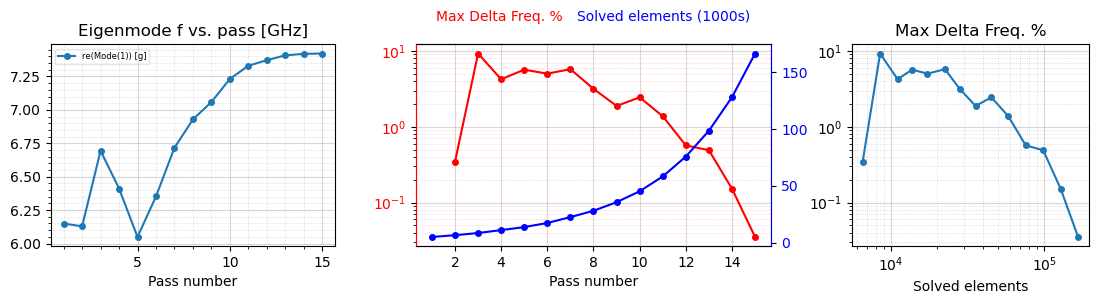

In [26]:
%matplotlib inline

hfss = eig_q12bus.sim.renderer

i = 6
# for i, name in enumerate(qubit_names):
#     i += 1

#     ### Run ANSYS simulation
#     # if i == 3 or i == 5 or i == 6:
#     #     open_terminations = [(f'cpw{i}', 'start')]
#     # else:
#     #     open_terminations = []

#     if i != 3:
#         continue
    
    # Clear previous design and renderer new design
eig_q12bus.sim.run(name="Q3RO_v5.0",
                    components=[f"otg{i}", f'cpw{i}', f'clt{i}' if i == 1 or i == 2 or i == 4 else f'ncap{i}'],
                    open_terminations = [(f'clt{i}' if i == 1 or i == 2 or i == 4 else f'ncap{i}', 'prime_start'), (f'clt{i}' if i == 1 or i == 2 or i == 4 else f'ncap{i}', "prime_end")],
                    port_list = [(f'clt{i}' if i == 1 or i == 2 or i == 4 else f'ncap{i}', 'prime_start', "50"), (f'clt{i}' if i == 1 or i == 2 or i == 4 else f'ncap{i}', "prime_end", "50")]
                    )

### Plot convergences
eig_q12bus.sim.plot_convergences()


In [27]:
f = eig_q12bus.get_frequencies()

freq = f.values[0][0] * 1e9
Q = f.values[0][1]
kappa = freq / Q

Design "Q3RO_v5.0_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Q3RO_v5.0_hfss" info:
	# eigenmodes    1
	# variations    1


In [28]:
print(f"freq = {round(freq/1e9, 3)} GHz")
print(f"Q = {round(Q, 1)}")
print(f"kappa = {round(kappa/1e6, 3)} MHz")

freq = 7.422 GHz
Q = 5950.5
kappa = 1.247 MHz


# LOM Analysis

In [2]:
qubit_names = [f'Q{i}' for i in range(1,7)]
for name in qubit_names:
    Lj = design.components[name].options['aedt_hfss_inductance']
    design.components[name].options['q3d_inductance'] = str(Lj) + "H"
design.rebuild()

In [3]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [5]:
c1.sim.setup.reuse_selected_design = False
c1.sim.setup.reuse_setup = False

# example: update single setting
c1.sim.setup.max_passes = 30
c1.sim.setup.min_converged_passes = 1
c1.sim.setup.percent_error = 0.1
c1.sim.setup.auto_increase_solution_order = 'False'
c1.sim.setup.solution_order = 'Medium'

c1.sim.setup.name = 'lom_setup'

# import inspect
# inspect.signature(c1.sim.renderer.modeler.mesh_length)
# c1.sim.renderer.modeler.mesh_length('ground_strip_mesh', ['ground_main_plane'], MaxLength = '3um')
# c1.sim.renderer.modeler.mesh_length('claw_mesh', ['c_connector_arm_Q1'], MaxLength = '5um')
# c1.sim.renderer.modeler.mesh_length('cross_mesh', ['cross_Q1'], MaxLength = '10um')


# .mesh_length('ground_strip', ['ground_main_plane'], MaxLength = '0.003mm')
c1.sim.setup

# c1

{'name': 'lom_setup',
 'reuse_selected_design': False,
 'reuse_setup': False,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 30,
 'min_passes': 2,
 'min_converged_passes': 1,
 'percent_error': 0.1,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [6]:
c1.sim.renderer.start()

INFO 05:34PM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:34PM [load_ansys_project]: 	Opened Ansys App
INFO 05:34PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:34PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   test_qubit_cavity_saruman_proj
INFO 05:34PM [connect_design]: 	Opened active design
	Design:    xmon_v1.0 [Solution type: Q3D]
INFO 05:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 05:34PM [connect]: 	Connected to project "test_qubit_cavity_saruman_proj" and design "xmon_v1.0" 😀 



True

In [19]:
import inspect

inspect.signature(c1.sim.renderer.add_mesh)

<Signature ()>

In [8]:
c1.sim.renderer.clean_active_design()
c1.sim.renderer.render_design(['Q1'], [('Q1','c')])

In [15]:
c1.sim.setup

{'name': 'lom_setup',
 'reuse_selected_design': False,
 'reuse_setup': False,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 30,
 'min_passes': 2,
 'min_converged_passes': 1,
 'percent_error': 0.1,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [9]:
c1.sim.renderer.analyze_setup(c1.sim.setup.name)

OSError: Setup lom_setup not found: ('Setup',)

In [35]:
all_cap_matricies = []

for i, name in enumerate(qubit_names):
    i += 1
    if i != 1:
        continue

    ### Render design
    # if i == 3 or i == 5 or i == 6: # Finger coupler
    #     selection = [f'Q{i}']
    #     open_pins = [(f'Q{i}', 'c')]
    # else: # Hanging resonator coupler
    #     selection = [f'Q{i}', f'cpw{i}', f'clt{i}']
    #     open_pins = [(f'clt{i}', 'prime_start'), (f'clt{i}', 'prime_end')]

    selection = [f'Q{i}']
    open_pins = [(f'Q{i}', 'c')]


    c1.sim.run(name = 'LOMv2.0', components=selection,
               open_terminations=open_pins)
    cap_df = c1.sim.capacitance_matrix

    all_cap_matricies.append(cap_df)

    print(f'For Qubit {i}, the cap matrix is...')
    print(cap_df)

INFO 05:22PM [connect_design]: 	Opened active design
	Design:    LOMv1.0_q3d16 [Solution type: Q3D]
WARNING 05:22PM [connect_setup]: 	No design setup detected.
WARNING 05:22PM [connect_setup]: 	Creating Q3D default setup.
INFO 05:22PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 05:22PM [get_setup]: 	Opened setup `lom_setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 05:22PM [analyze]: Analyzing setup lom_setup
INFO 05:24PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpyzs1gkll.txt, C, , lom_setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 05:24PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpogoo3sy6.txt, C, , lom_setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 05:24PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpv4rjm19n.txt, C, , lom_setup:AdaptivePass, "Original", "ohm", 

For Qubit 1, the cap matrix is...
                    c_connector_arm_Q1   cross_Q1  ground_main_plane
c_connector_arm_Q1           111.13298   -5.75642         -104.91049
cross_Q1                      -5.75642  126.67822         -118.27675
ground_main_plane           -104.91049 -118.27675          277.73492


In [37]:
q3d = c1.sim.renderer

q3d.start()
q3d.activate_ansys_design("xmon_v1.0", 'capacitive')

q3d.render_design(['Q1'], [('Q1','c')])

INFO 05:26PM [connect_project]: Connecting to Ansys Desktop API...
INFO 05:26PM [load_ansys_project]: 	Opened Ansys App
INFO 05:26PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 05:26PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   test_qubit_cavity_saruman_proj
INFO 05:26PM [connect_design]: 	Opened active design
	Design:    xmon_v1.0 [Solution type: Q3D]
INFO 05:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 05:26PM [connect]: 	Connected to project "test_qubit_cavity_saruman_proj" and design "xmon_v1.0" 😀 

INFO 05:26PM [connect_design]: 	Opened active design
	Design:    xmon_v1.0 [Solution type: Q3D]
05:26PM 10s ERROR [subtract_from_ground]: This error might indicate that a component was not correctly rendered in Ansys. 
This might have been caused by floating point numerical corrections. 
 For example Ansys will inconsistently render (or not) routing that has 180deg jogs with the two a

com_error:  (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024381), None)


com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147024381), None)

In [38]:
c1.sim.setup.name

'lom_setup'

In [39]:
q3d.analyze_setup(c1.sim.setup.name)

OSError: Setup lom_setup not found: ('Setup',)

In [31]:
c1.sim.renderer.pinfo.get_setup('Setup')

INFO 05:20PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [25]:
c1.sim.capacitance_matrix, c1.sim.units = q3d.get_capacitance_matrix()
c1.sim.capacitance_all_passes, _ = q3d.get_capacitance_all_passes()
c1.sim.capacitance_matrix

INFO 05:16PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpk4b9k1yw.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 05:16PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmp02cw6jan.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 05:16PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpgp0vsdf4.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 05:16PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpzgvfeefr.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 05:16PM [get_matrix]: Exporting matrix data to (C:\Users\lfl\AppData\Local\Temp\tmpq54omvnm.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 4, False
INFO 05:16PM [get_ma

,c_connector_arm_Q1,cross_Q1,ground_main_plane
c_connector_arm_Q1,108.59832,-5.70096,-102.37345
cross_Q1,-5.70096,125.13198,-117.02097
ground_main_plane,-102.37345,-117.02097,274.00678


In [33]:
import json
from datetime import datetime

def save_simulation_data_to_json(data):
    current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"simulation_data_{123}.json"
    
    # with open(filename, 'a') as outfile:
    #     json.dump(data, outfile, indent=4)

    with open(filename, 'a+') as f:
        d = json.load(f)

    d.update(data)

    with open(filename, 'a+') as f:
        json.dump(d, f, indent = 4)

In [12]:
c1.sim.renderer.

{'sim_setup_name': 'Setup1',
 'cap_matrix':                     c_connector_arm_Q1   cross_Q1  ground_main_plane
 c_connector_arm_Q1           110.51368   -5.73626         -104.32296
 cross_Q1                      -5.73626  126.17422         -117.75711
 ground_main_plane           -104.32296 -117.75711          277.17290,
 'units': 'fF',
 'cap_all_passes': {1: array([[ 8.1493620e-14, -5.3059300e-15, -7.6187690e-14],
         [-5.3059300e-15,  1.1045144e-13, -1.0386853e-13],
         [-7.6187690e-14, -1.0386853e-13,  2.5165089e-13]]),
  2: array([[ 8.6022360e-14, -5.7787800e-15, -7.9762640e-14],
         [-5.7787800e-15,  1.1039483e-13, -1.0265507e-13],
         [-7.9762640e-14, -1.0265507e-13,  2.4729917e-13]]),
  3: array([[ 9.3325290e-14, -5.3844500e-15, -8.7408470e-14],
         [-5.3844500e-15,  1.1603519e-13, -1.0864835e-13],
         [-8.7408470e-14, -1.0864835e-13,  2.5627352e-13]]),
  4: array([[ 9.9200830e-14, -5.3986300e-15, -9.3332180e-14],
         [-5.3986300e-15,  1.18853